In [95]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [97]:
data = fetch_openml('credit-g', as_frame=False)
data

{'data': array([['<0', 6, 'critical/other existing credit', ..., 1, 'yes', 'yes'],
        ['0<=X<200', 48, 'existing paid', ..., 1, 'none', 'yes'],
        ['no checking', 12, 'critical/other existing credit', ..., 2,
         'none', 'yes'],
        ...,
        ['no checking', 12, 'existing paid', ..., 1, 'none', 'yes'],
        ['<0', 45, 'existing paid', ..., 1, 'yes', 'yes'],
        ['0<=X<200', 45, 'critical/other existing credit', ..., 1, 'none',
         'yes']], dtype=object),
 'target': array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
        'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
        'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
        'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
        'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
        'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
        'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',

In [98]:
X = data["data"]
y = data["target"]
features = data["feature_names"]

In [99]:
type(y)

numpy.ndarray

In [100]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [101]:
categorical_columns = list(data["categories"].keys())
continuous_columns = list(set(features) - set(categorical_columns))
category_values = list(data["categories"].values())

In [102]:
categorical_columns_index = [i for i,v in enumerate(features) if(v in categorical_columns)]
continuous_columns_index = [i for i,v in enumerate(features) if(v in continuous_columns)]

In [103]:
print("- Following is the list of continuous features:")
print(continuous_columns)
print()
print("- Following is the list of categorical features:")
print(categorical_columns)

- Following is the list of continuous features:
['existing_credits', 'residence_since', 'duration', 'age', 'installment_commitment', 'num_dependents', 'credit_amount']

- Following is the list of categorical features:
['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


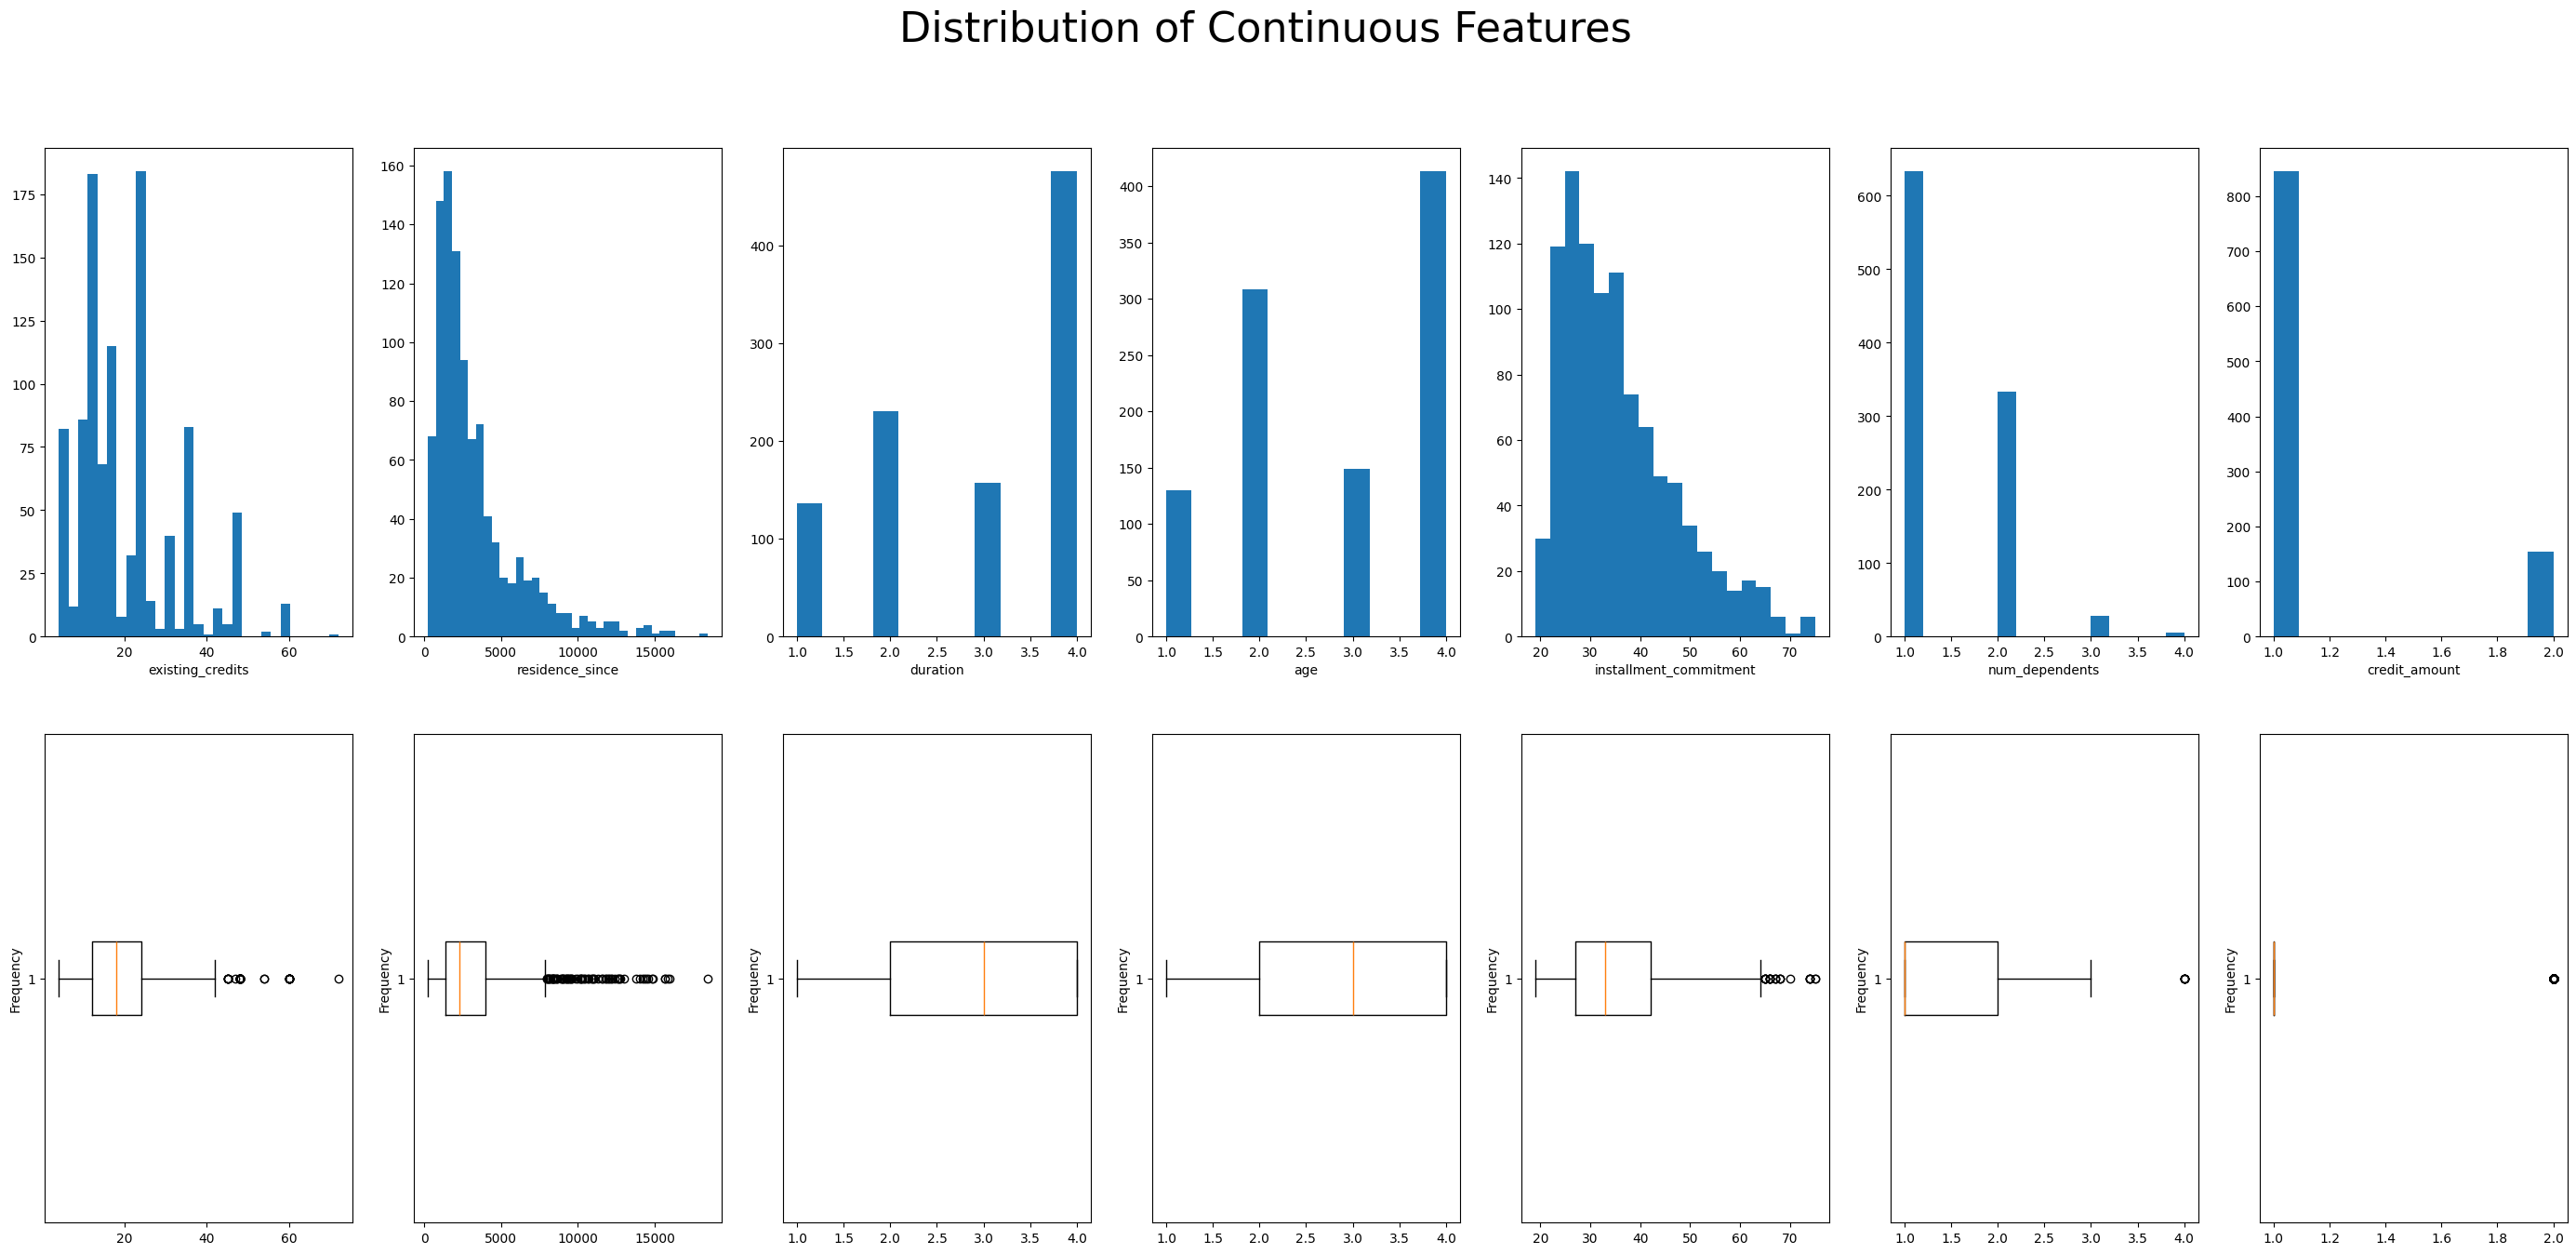

In [127]:
fig, axes = plt.subplots(2, len(continuous_columns_index) , figsize=(35, 15))

for i in range(len(continuous_columns_index)):
    axes[0,i].hist(X[:,continuous_columns_index[i]],bins = "auto")
    axes[1,i].boxplot(X[:,continuous_columns_index[i]], vert=False)
    axes[0,i].set_xlabel(continuous_columns[i])
    axes[1,i].set_ylabel("Frequency")

fig.suptitle("Distribution of Continuous Features", fontsize=32)
plt.show()

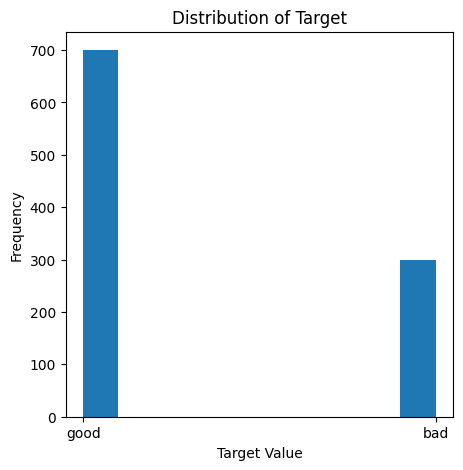

In [105]:
fig, axes = plt.subplots(figsize=(5, 5))
axes.hist(y)
axes.set_xlabel("Target Value")
axes.set_ylabel("Frequency")
axes.set_title("Distribution of Target")

plt.show()

In [128]:
X_df = pd.DataFrame(X, columns = features)
y_df = pd.DataFrame(y, columns = ["target"])

In [129]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=42)

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42)

In [131]:
ohe = OneHotEncoder(handle_unknown="ignore")
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), categorical_columns_index)], remainder='passthrough')
ct = ct.fit(X_train)
X_train_preprocessed = ct.transform(X_train)
X_val_preprocessed = ct.transform(X_val)

In [116]:
log_reg = LogisticRegression(random_state = 42)

In [117]:
log_reg.fit(X_train_preprocessed,y_train)

LogisticRegression(random_state=42)

In [118]:
score = log_reg.score(X_val_preprocessed,y_val)
print("The validation score for Logistic Regression is: " + str(score))

The validation score for Logistic Regression is: 0.7375


In [119]:
model_names = ["LogisticRegression", "LinearSVC", "KNeighboursClassifier"]
model_list = [ LogisticRegression(), LinearSVC(), KNeighborsClassifier()]

In [120]:
preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), categorical_columns_index),remainder="passthrough")

scores = []
for i in range(len(model_list)):
    score = cross_val_score(make_pipeline(preprocess, model_list[i]), X_train_val, y_train_val, cv=5)
    scores.append(np.mean(score))
    
for i in range(len(model_names)):
    print("The validation score for " + model_names[i] +" is " + str(scores[i]))

The validation score for LogisticRegression is 0.7387499999999999
The validation score for LinearSVC is 0.56
The validation score for KNeighboursClassifier is 0.6537499999999999


In [ ]:
preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), categorical_columns_index),(StandardScaler(), continuous_columns_index))

scores = []
for i in range(len(model_list)):
    score = cross_val_score(make_pipeline(preprocess, model_list[i]), X_train_val, y_train_val, cv=5)
    scores.append(np.mean(score))
    
for i in range(len(model_names)):
    print("The validation score for " + model_names[i] +" is " + str(scores[i]))

In [ ]:
preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), categorical_columns_index),(StandardScaler(), continuous_columns_index))

pipe = Pipeline([('preprocess', preprocess),
                 ('classfier', LogisticRegression())])

param_grid = [{'classfier': [LogisticRegression(random_state=42)],
               'classfier__C': np.logspace(-3, 2, 10)},
              {'classfier': [LinearSVC(random_state=42)],
               'classfier__C': np.logspace(-3, 2, 10)},
              {'classfier': [KNeighborsClassifier()],
               'classfier__n_neighbors': range(1,15,2)}
             ]
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train_val, y_train_val)
best_score = grid.score(X_test, y_test)

print("The best score:" + str(best_score))
print("The best method along with its parameter values is: " + str(grid.best_params_))

In [ ]:
plots = pd.DataFrame(grid.cv_results_)
plots["LR"]= [isinstance(plots["param_classfier"][i],LogisticRegression) for i in range(plots.shape[0])]
plots["SVM"] = [isinstance(plots["param_classfier"][i],LinearSVC) for i in range(plots.shape[0])]
plots["KNN"] = [isinstance(plots["param_classfier"][i],KNeighborsClassifier) for i in range(plots.shape[0])]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(plots[plots["LR"]]["param_classfier__C"],plots[plots["LR"]]["mean_test_score"])
axes[1].plot(plots[plots["SVM"]]["param_classfier__C"],plots[plots["SVM"]]["mean_test_score"])
axes[2].plot(plots[plots["KNN"]]["param_classfier__n_neighbors"],plots[plots["KNN"]]["mean_test_score"])
axes[0].set_xlabel("Value of C")
axes[0].set_ylabel("Mean Test Score")
axes[0].set_title("Logistic Regression")

axes[1].set_xlabel("Value of C")
axes[1].set_ylabel("Mean Test Score")
axes[1].set_title("Linear SVM")

axes[2].set_xlabel("No of Neighbours")
axes[2].set_ylabel("Mean Test Score")
axes[2].set_title("K Nearest Neighbours")

plt.show()

In [ ]:

preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), categorical_columns_index),(StandardScaler(), continuous_columns_index))

pipe = Pipeline([('preprocess', preprocess),
                 ('classfier', LogisticRegression())])

param_grid = [{'classfier': [LogisticRegression(random_state=42)],
               'classfier__C': np.logspace(-3, 2, 10)},
              {'classfier': [LinearSVC(random_state=42)],
               'classfier__C': np.logspace(-3, 2, 10)},
              {'classfier': [KNeighborsClassifier()],
               'classfier__n_neighbors': range(1,15,2)}
             ]
grid = GridSearchCV(pipe, param_grid,cv = KFold(shuffle=True , random_state=100))
grid.fit(X_train_val, y_train_val)
best_score = grid.score(X_test, y_test)

print("The best score (on the test):" + str(best_score))
print("The best method along with its parameter values is: " + str(grid.best_params_))

In [ ]:
preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), categorical_columns_index),(StandardScaler(), continuous_columns_index))

pipe = Pipeline([('preprocess', preprocess),
                 ('classfier', LogisticRegression())])

param_grid = [{'classfier': [LogisticRegression(random_state=42)],
               'classfier__C': np.logspace(-3, 2, 10)},
              {'classfier': [LinearSVC(random_state=42)],
               'classfier__C': np.logspace(-3, 2, 10)},
              {'classfier': [KNeighborsClassifier()],
               'classfier__n_neighbors': range(1,15,2)}
             ]
grid = GridSearchCV(pipe, param_grid,cv = KFold(shuffle=True , random_state=42))
grid.fit(X_train_val, y_train_val)
best_score = grid.score(X_test, y_test)

print("The best score (on the test):" + str(best_score))
print("The best method along with its parameter values is: " + str(grid.best_params_))

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=83)

preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), categorical_columns_index),(StandardScaler(), continuous_columns_index))

pipe = Pipeline([('preprocess', preprocess),
                 ('classfier', LogisticRegression())])

param_grid = [{'classfier': [LogisticRegression(random_state=42)],
               'classfier__C': np.logspace(-3, 2, 10)},
              {'classfier': [LinearSVC(random_state=42)],
               'classfier__C': np.logspace(-3, 2, 10)},
              {'classfier': [KNeighborsClassifier()],
               'classfier__n_neighbors': range(1,15,2)}
             ]
grid = GridSearchCV(pipe, param_grid,cv = KFold(shuffle=True , random_state=42))
grid.fit(X_train_val, y_train_val)
best_score = grid.score(X_test, y_test)

print("The best score (on the test):" + str(best_score))
print("The best method along with its parameter values is: " + str(grid.best_params_))

In [ ]:
preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), categorical_columns_index),(StandardScaler(), continuous_columns_index))

pipe1 = Pipeline([('preprocess', preprocess),
                 ('classifier', LogisticRegression(random_state=42))])

param_grid = [{'classifier__C': np.logspace(-3, 2, 10)}]
grid = GridSearchCV(pipe1, param_grid)
grid.fit(X_train_val, y_train_val)
best_score = grid.score(X_test, y_test)

print("The best parameter values for Logistic Regression: " + str(grid.best_params_))

In [ ]:
pipe = Pipeline([('scaler', preprocess),('classifier', LogisticRegression(C=grid.best_params_["classifier__C"]))])
pipe.fit(X_train_val,y_train_val)

coefficients=pipe.get_params()['classifier'].coef_
cat_names= list(preprocess.named_transformers_['onehotencoder'].get_feature_names())
features = continuous_columns.copy()
features.extend(cat_names)


coefficient_list = list(coefficients[0])

# combined_list = [(i,j) for i,j in zip(coefficient_list,features)]
# sorted_combination =sorted(combined_list, key = lambda x: abs(x[0]),reverse=True)
# top_20 = sorted_combination[:20]

fig, axes = plt.subplots()
for coef in sorted(coefficient_list,key = lambda x: abs(x),reverse=True)[:20]:
    plt.barh(features[coefficient_list.index(coef)], coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    
plt.xlabel("Coefficient value")
plt.ylabel("Label")
plt.title("20 most important coefficients for LogisticRegression")
plt.tight_layout()

In [ ]:
preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), categorical_columns_index),(StandardScaler(), continuous_columns_index))

pipe1 = Pipeline([('preprocess', preprocess),
                 ('classifier', LinearSVC(random_state=42))])

param_grid = [{'classifier__C': np.logspace(-3, 2, 10)}]
grid = GridSearchCV(pipe1, param_grid)

grid.fit(X_train_val, y_train_val)
best_score = grid.score(X_test, y_test)

print("The best parameter values for Linear SVM: " + str(grid.best_params_))

In [ ]:
pipe = Pipeline([('scaler', preprocess),('classifier', LinearSVC(C=grid.best_params_["classifier__C"]))])
pipe.fit(X_train_val,y_train_val)

coefficients=pipe.get_params()['classifier'].coef_
cat_names= list(preprocess.named_transformers_['onehotencoder'].get_feature_names())
features = continuous_columns.copy()
features.extend(cat_names)

coefficient_list = list(coefficients[0])

# combined_list = [(i,j) for i,j in zip(coefficient_list,features)]
# sorted_combination =sorted(combined_list, key = lambda x: abs(x[0]),reverse=True)
# top_20 = sorted_combination[:20]

fig, axes = plt.subplots()
for coef in sorted(coefficient_list,key = lambda x: abs(x),reverse=True)[:20]:
    plt.barh(features[coefficient_list.index(coef)], coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    
plt.xlabel("Coefficient value")
plt.ylabel("Label")
plt.title("20 most important coefficients for LogisticRegression")
plt.tight_layout()